# Variable methylation and IAP GC content

Running a few plots to look at VM IAPs and their flanking sequences, comparing them to a) random sequence and b) stably methylated IAPs. Also looking at distance to nearest gene, upstream/downstream bias.

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pybedtools
from pyfaidx import Fasta
from Bio import SeqIO
from Bio.SeqUtils import GC
%matplotlib inline
mpl.rcParams['figure.dpi']= 100

mm_fasta = pybedtools.BedTool('data/GRCm38.p6.genome.fa')
iap = pybedtools.BedTool('data/clean.mm10.IAP.mended.extent.bed')
vm_iap = pybedtools.BedTool('data/clean.IAP_validation.July2019.stranded.bed')
true_iap = vm_iap.filter(lambda x: x[8] == 'True ME')
false_iap = vm_iap.filter(lambda x: x[8] == 'False-positive')
tissue_iap = vm_iap.filter(lambda x: x[8] == 'Tissue-specific')

In [9]:
true_iap = true_iap.sequence(fi=mm_fasta)
false_iap = false_iap.sequence(fi=mm_fasta)
tissue_iap = tissue_iap.sequence(fi=mm_fasta)

In [10]:
true_gc = [GC(rec.seq) for rec in SeqIO.parse(true_iap.seqfn, "fasta")]
false_gc = [GC(rec.seq) for rec in SeqIO.parse(false_iap.seqfn, "fasta")]
tissue_gc = [GC(rec.seq) for rec in SeqIO.parse(tissue_iap.seqfn, "fasta")]

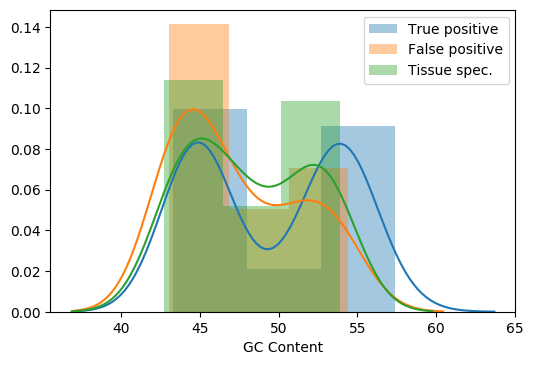

In [11]:
sns.distplot(true_gc, label='True positive')
sns.distplot(false_gc, label='False positive')
sns.distplot(tissue_gc, label='Tissue spec.')
plt.xlabel('GC Content')
plt.legend()

In [27]:
flank_true = vm_iap.filter(lambda x: x[8] == 'True ME').flank(genome='mm10', b=10000).sequence(fi=mm_fasta)
flank_true_gc = [GC(rec.seq) for rec in SeqIO.parse(flank_true.seqfn, "fasta")]

flank_false = vm_iap.filter(lambda x: x[8] == 'False-positive').flank(genome='mm10', b=10000).sequence(fi=mm_fasta)
flank_false_gc = [GC(rec.seq) for rec in SeqIO.parse(flank_false.seqfn, "fasta")]

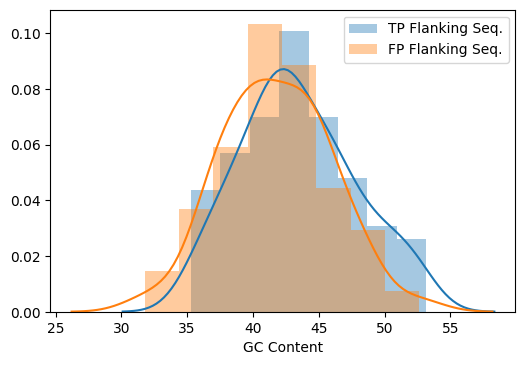

In [30]:
sns.distplot(flank_true_gc, label='TP Flanking Seq.')
sns.distplot(flank_false_gc, label='FP Flanking Seq.')
plt.xlabel('GC Content')
plt.legend()